# Shared provision

This type of provision can be used for service types such as `park` etc. Where one demand doesn't compete with any other demand.

In [1]:
import pandas as pd

blocks_gdf = pd.read_pickle('./../../data/saint_petersburg/blocks.pickle')
accessibility_matrix = pd.read_pickle('./../../data/saint_petersburg/accessibility_matrix_intermodal.pickle')

In [2]:
from blocksnet.config import service_types_config

service_type = 'park'
accessibility = service_types_config[service_type]['accessibility']
accessibility

30

In [4]:
from blocksnet.analysis.provision import shared_provision

gdf = blocks_gdf.rename(columns={f'capacity_{service_type}': 'capacity'})
blocks_df = shared_provision(gdf, accessibility_matrix, accessibility)

2025-09-19 18:44:28.328 | INFO     | blocksnet.analysis.provision.shared.core:_initialize_provision_df:17 - Initializing provision DataFrame
2025-09-19 18:44:29.275 | SUCCESS  | blocksnet.analysis.provision.shared.core:shared_provision:61 - Provision assessment finished


In [5]:
blocks_df.head()

,population,capacity,capacity_within,population_within,load,provision
0,0,0,0,1680,NaN,NaN
1,0,1906,41932,23757,12.464323,NaN
2,109,0,0,904,NaN,0.0
3,77,0,0,904,NaN,0.0
4,431,0,0,63244,NaN,0.0


`provision` - how much capacity within the accessibility is provided per resident of the block

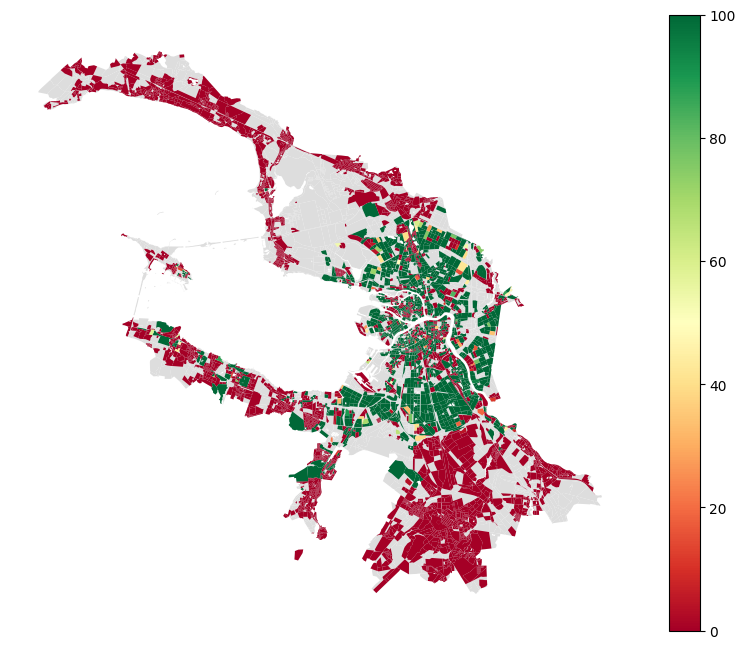

In [6]:
ax=blocks_gdf.plot(color='#ddd', figsize=(10,8))
blocks_gdf[['geometry']].join(blocks_df).plot(ax=ax, column='provision', cmap='RdYlGn', vmin=0, vmax=100, legend=True).set_axis_off()

`load` - how much population within the accessibility is provided by the capacity of the block

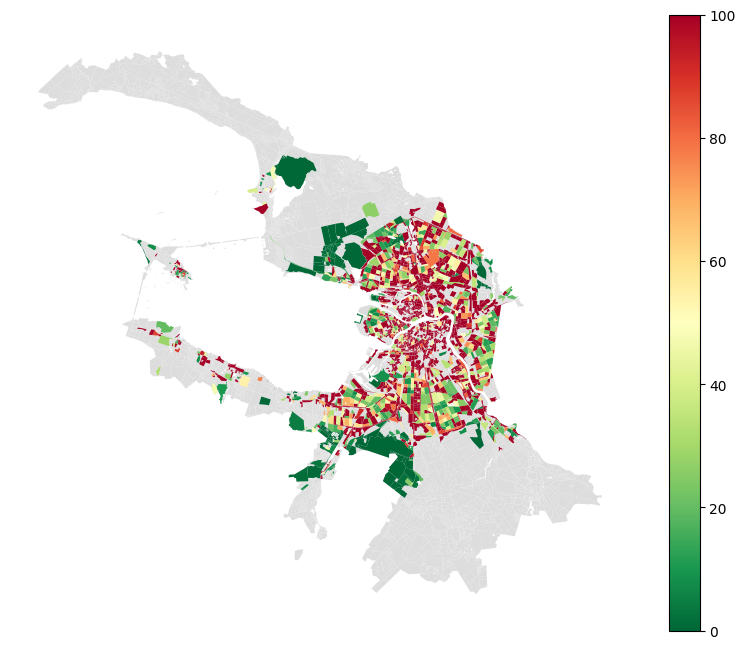

In [8]:
ax=blocks_gdf.plot(color='#ddd', figsize=(10,8))
blocks_gdf[['geometry']].join(blocks_df).plot(ax=ax, column='load', cmap='RdYlGn_r', vmin=0, vmax=100, legend=True).set_axis_off()